In [1]:
import sys
sys.path.append('../src/mnist')
sys.path.append('../src')

In [2]:
from mnist_original_moe_training import *
from original_moe_training import *

/nobackup/projects/bdrap03/yamuna/miniconda/envs/mnn/lib/python3.9/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Image shape torch.Size([1, 28, 28])
Train samples  50000
Validation samples 10000
Test samples  10000
device cuda:0


In [3]:
from helper.collect_results import *

device cuda:0


In [4]:
# Paths to where the trained models and figures will be stored. You can change this as you see fit.
fig_path = '../figures/mnist'
model_path = '../models/mnist'
results_path = '../results/mnist'

if not os.path.exists(fig_path):
    os.mkdir(fig_path)
if not os.path.exists(model_path):
    os.mkdir(model_path)
if not os.path.exists(results_path):
    os.mkdir(results_path)        

### Collect the train error, test error, mutual information $I(E;Y)$, sample entropy $H_s$ and expert usage entropy $H_u$ for all the models trained with MNIST dataset. Store the reuslts in the '../results/mnist_results.csv' file.

In [5]:
total_experts = 5
num_classes = 10
num_epochs = 100

In [6]:
filename = 'mnist_top_k_results_5.csv'

In [7]:
m = 'mnist_single_model'
collect_single_result(m, num_classes, num_epochs, testloader=testloader, 
                      model_path=model_path, results_path=results_path, filename=filename)

In [7]:
for k in range(1, 3):
    m = 'mnist_rand_init_top_'+str(k)
    collect_results(m, 'moe_top_k_model', k=k, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [8]:
for k in range(1, 3):
    m = 'mnist_with_attn_rand_init_top_'+str(k)
    collect_results(m, 'moe_top_k_model', k=k, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [9]:
m = 'mnist_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [10]:
m = 'mnist_with_attn_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [11]:
m = 'mnist_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [12]:
m = 'mnist_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [13]:
m = 'mnist_loss_gate_rand_init'
collect_loss_gate_results(m, 'moe_expert_loss_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                    testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [14]:
m = 'mnist_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [15]:
m = 'mnist_with_attn_importance_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [16]:
m = 'mnist_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model',w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [17]:
m = 'mnist_with_attn_importance_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [18]:
m = 'mnist_rand_init'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [19]:
m = 'mnist_with_attn_rand_init'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range, 
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [20]:
m = 'mnist_rand_init_top_2'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [21]:
m = 'mnist_with_attn_rand_init_top_2'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [22]:
m = 'mnist_no_gate_entropy_argmax_no_gate_T_10.0'
collect_results(m, 'moe_no_gate_entropy_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [48]:
m = 'new_mnist_no_gate_self_information'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [49]:
m = 'new_mnist_no_gate_self_information_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [50]:
m = 'new_mnist_no_gate_self_information_top_2'
collect_results(m, 'moe_top_k_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [23]:
m = 'new_mnist_with_attn_rand_init'
collect_results(m, 'moe_expectation_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [31]:
m = 'new_mnist_with_attn_stochastic_rand_init'
collect_results(m, 'moe_stochastic_model', total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [32]:
m = 'new_mnist_with_attn_rand_init_top_1'
collect_results(m, 'moe_top_k_model', k=1, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [33]:
m = 'new_mnist_with_attn_rand_init_top_2'
collect_results(m, 'moe_top_k_model', k=2, total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [24]:
m = 'new_mnist_with_attn_rand_init'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_expectation_model', w_sample_sim_same_range=w_sample_sim_same_range, 
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [25]:
m = 'new_mnist_with_attn_rand_init_top_2'
w_sample_sim_same_range = [1e-6, 1e-5]
w_sample_sim_diff_range = [1e-6, 1e-5,1e-4,1e-3,1e-2,1e-1]
collect_results(m, 'moe_top_k_model', w_sample_sim_same_range=w_sample_sim_same_range,
                w_sample_sim_diff_range=w_sample_sim_diff_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [26]:
m = 'new_mnist_with_attn_importance_rand_init'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_expectation_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [27]:
m = 'new_mnist_with_attn_importance_rand_init_top_2'
w_importance_range = [i * 0.2 for i in range(1, 6)]
collect_results(m, 'moe_top_k_model', w_importance_range=w_importance_range,
                total_experts=total_experts, num_classes=num_classes, num_epochs=num_epochs, 
                testloader=testloader, model_path=model_path, results_path=results_path, filename=filename)

In [28]:
m = 'mnist_rand_init'

temps = [1.1, 1.2, 1.3, 1.4, 1.5, 2, 4, 6, 8, 10, 16, 20]
T_decay = [0.001, 0.01, 0.1]

collect_results(m, 'moe_expectation_model', temps=temps, T_decay=T_decay, total_experts=total_experts, num_classes=num_classes,
                num_epochs=num_epochs, testloader=testloader, model_path=model_path, results_path=results_path, 
                filename=filename)

In [29]:
m = 'mnist_stochastic_rand_init'

temps = [1.1, 1.2, 1.3, 1.4, 1.5, 2, 4, 6, 8, 10, 16, 20]

T_decay = [0.001, 0.01, 0.1]

collect_results(m, 'moe_stochastic_model', temps=temps, T_decay=T_decay, total_experts=total_experts, num_classes=num_classes,
                num_epochs=num_epochs, testloader=testloader, model_path=model_path, results_path=results_path, 
                filename=filename)

### Final results

#### These are the final performance results, reported in the paper, on the test data for the model with the minimum training error for each category of MoE model and training method.

In [10]:
import pandas as pd
filename = os.path.join(results_path, 'mnist_top_k_results.csv')
data = pd.read_csv(filename)

In [11]:
final_results_filename = os.path.join(results_path, 'mnist_top_k_final_results.csv')

In [12]:
models = ['mnist_rand_init_10', 'mnist_with_attn_rand_init_10',
          'mnist_stochastic_rand_init_10', 'mnist_with_attn_stochastic_rand_init_10']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10') 

models += [ 'mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_10.0', 
           'new_mnist_no_gate_self_information_10_10',
           'new_mnist_no_gate_self_information_top_1', 'new_mnist_no_gate_self_information_top_2', 
           'mnist_rand_init_temp', 'mnist_stochastic_rand_init_temp',
           'new_mnist_with_attn_rand_init_10', 'new_mnist_with_attn_stochastic_rand_init',
           'new_mnist_with_attn_rand_init_top_1', 'new_mnist_with_attn_rand_init_top_2',
           'new_mnist_with_attn_importance_rand_init_importance', 'new_mnist_with_attn_importance_rand_init_top_2',
           'new_mnist_with_attn_rand_init_sample', 'new_mnist_with_attn_rand_init_top_2_sample',
     ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [34]:
models = ['mnist_rand_init_10', 'mnist_with_attn_rand_init_10',
          'mnist_stochastic_rand_init_10', 'mnist_with_attn_stochastic_rand_init_10']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10') 

models += [ 'mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_10.0', 
           'new_mnist_no_gate_self_information_10_10',
           'new_mnist_no_gate_self_information_top_1', 'new_mnist_no_gate_self_information_top_2', 
           'mnist_rand_init_temp', 'mnist_stochastic_rand_init_temp',
           'new_mnist_with_attn_rand_init_10',        
           'new_mnist_with_attn_importance_rand_init_importance', 'new_mnist_with_attn_importance_rand_init_top_2',
           'new_mnist_with_attn_rand_init_sample', 'new_mnist_with_attn_rand_init_top_2_sample',
     ]
header = True
# df = None
std = ['{:.3f}'.format(std_val) for std_val in data.groupby('filename')['test error'].std().values]
data = data.groupby('filename').mean().reset_index()
# print('data', data)
for i, m in enumerate(models):
    model_data = data[data['filename'].str.startswith(m)]
    # if 'sample_sim' in m:
    #     print('model_data', model_data)
    if model_data.empty:
        continue
    if i:
        header = False
    index = model_data.index.values[0]
    row = pd.DataFrame(model_data.values, columns=model_data.columns)
    row = model_data.loc[[model_data['val error'].idxmin()]]
    row['val error'] = (1-row['val error'])*100
    row['test error'] = (1-row['test error'])*100   
    row.insert(3, 'test error std', std[index])
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [86]:
models = ['mnist_rand_init_10', 'mnist_with_attn_rand_init_10',
          'mnist_stochastic_rand_init', 'mnist_with_attn_stochastic_rand_init']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10') 

models += [ 'mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_10.0',
           'new_mnist_no_gate_self_information_10_10', 'new_mnist_no_gate_self_information_top_1_10_10',
           'new_mnist_no_gate_self_information_top_2_10_10'
     ]

header = True
df = None
std = ['{:.3f}'.format(std_val) for std_val in data.groupby('filename')['test error'].std().values]
data = data.groupby('filename').mean().reset_index()
for i, m in enumerate(models):
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    if i:
        header = False
    index = model_data.index.values[0]
    series = model_data.mean(numeric_only=True)
    row = pd.DataFrame([series.values], columns=series.index)
    row['val error'] = (1-row['val error'])*100
    row['test error'] = (1-row['test error'])*100
    row.insert(2, 'test error std', std[index])
    row.insert(0, 'filename' , model_data['filename'].iloc[0])
    if df is None:
        df = row
    else:
        df = pd.concat([df, row])
header = ['filename', 'val error', 'test error', 'test error std', 'mutual information', 'sample entropy', 'experts usage']
    
df.to_csv(final_results_filename,mode='a',header=header, index=False, float_format='%.3f')


In [9]:
models = ['mnist_rand_init_10', 'mnist_with_attn_rand_init_10',
          'mnist_stochastic_rand_init_10', 'mnist_with_attn_stochastic_rand_init_10']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10') 

models += [ 'mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_10.0',
           'new_mnist_no_gate_self_information_top_1','new_mnist_no_gate_self_information_top_2', 
           'new_mnist_no_gate_self_information_10_10', 
           'new_mnist_with_attn_rand_init_10',        
           'new_mnist_with_attn_importance_rand_init_importance', 'new_mnist_with_attn_importance_rand_init_top_2',
           'new_mnist_with_attn_rand_init_sample', 'new_mnist_with_attn_rand_init_top_2_sample',

     ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        best_model = data.loc[[model_data['val error'].idxmin()]]['filename'].values[0]
        
        model_data = data.loc[data['filename'] == best_model]
        
        series = model_data.mean(numeric_only=True)
        row = pd.DataFrame([series.values], columns=series.index)
        row.insert(0, 'filename', best_model)
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [13]:
# display final results
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

filename  val error  test error  \
0                     mnist_rand_init_10_10_models.pt     94.781       95.38   
1           mnist_with_attn_rand_init_10_10_models.pt     96.451       96.29   
2          mnist_stochastic_rand_init_10_10_models.pt     96.133       96.20   
3   mnist_with_attn_stochastic_rand_init_10_10_mod...     96.733       96.68   
4               mnist_rand_init_top_1_10_10_models.pt     94.916       94.83   
5     mnist_with_attn_rand_init_top_1_10_10_models.pt     95.176       95.55   
6               mnist_rand_init_top_2_10_10_models.pt     96.154       96.25   
7     mnist_with_attn_rand_init_top_2_10_10_models.pt     96.885       96.91   
8      mnist_rand_init_importance_0.2_10_10_models.pt     97.662       97.72   
9   mnist_with_attn_importance_rand_init_importanc...     97.475       97.49   
10  mnist_rand_init_top_2_importance_0.4_10_10_mod...     97.900       97.83   
11  mnist_with_attn_importance_rand_init_top_2_imp...     97.714       97.59   
12  mnist_rand_init_sample_sim_same_1e-05_sample_s...     96.546       96.65   
13  mnist_with_attn_rand_init_sample_sim_same_1e-0...     97.102       97.00   
14  mnist_rand_init_top_2_sample_sim_same_1e-05_sa...     97.181       97.20   
15  mnist_with_attn_rand_init_top_2_sample_sim_sam...     97.530       97.24   
16          mnist_loss_gate_rand_init_10_10_models.pt     94.461       94.41   
17  mnist_no_gate_entropy_argmax_no_gate_T_10.0_10...     95.862       95.98   
18  mnist_rand_init_temp_10.0_t_decay_0.1_10_10_mo...     96.263       96.31   
19  mnist_stochastic_rand_init_temp_1.4_t_decay_0....     96.702       96.80   
20      new_mnist_with_attn_rand_init_10_10_models.pt     96.326       96.57   
21  new_mnist_with_attn_stochastic_rand_init_10_10...     96.646       96.70   
22  new_mnist_with_attn_rand_init_top_1_10_10_mode...     95.769       95.83   
23  new_mnist_with_attn_rand_init_top_2_sample_sim...     96.924       96.91   
24  new_mnist_with_attn_importance_rand_init_impor...     97.685       97.79   
25  new_mnist_with_attn_importance_rand_init_top_2...     96.922       97.04   
26  new_mnist_with_attn_rand_init_sample_sim_same_...     97.320       97.08   
27  new_mnist_with_attn_rand_init_top_2_sample_sim...     96.924       96.91   

    mutual information  sample entropy  experts usage  per_task_entropy  \
0                1.488           0.031          1.490             0.155   
1                2.456           0.006          2.504             0.285   
2                1.405           0.000          1.516             0.223   
3                2.436           0.000          2.669             0.413   
4                1.357           0.000          1.357             0.161   
5                2.058           0.000          2.076             0.238   
6                1.663           0.074          1.912             0.405   
7                2.131           0.028          2.399             0.426   
8                3.319           0.053          3.319             0.249   
9                3.320           0.007          3.320             0.232   
10               3.283           0.054          3.320             0.271   
11               3.258           0.017          3.320             0.255   
12               2.384           0.060          2.476             0.300   
13               2.948           0.010          3.102             0.391   
14               2.233           0.039          2.248             0.198   
15               2.632           0.045          2.921             0.455   
16               1.278           0.000          3.272             2.074   
17               1.864           2.782          3.273             2.976   
18               1.426           0.089          1.937             0.646   
19               2.170           0.000          2.586             0.524   
20               2.447           0.009          2.447             0.217   
21               2.415           0.000          2.674             0.422   

In [8]:
import pandas as pd
filename = os.path.join(results_path, 'mnist_top_k_results_5.csv')
data = pd.read_csv(filename)

In [9]:
final_results_filename = os.path.join(results_path, 'mnist_top_k_final_results_5.csv')

In [10]:
models = ['mnist_single_model',
          'mnist_rand_init_10_5', 'mnist_with_attn_rand_init_10_5',
          'mnist_stochastic_rand_init_10_5', 'mnist_with_attn_stochastic_rand_init_10_5']

for k in range(1, 3):
    models.append('mnist_rand_init_top_'+str(k)+'_10_5')
    models.append('mnist_with_attn_rand_init_top_'+str(k)+'_10_5') 

models += ['mnist_rand_init_importance', 'mnist_with_attn_importance_rand_init_importance',
           'mnist_rand_init_top_2_importance', 'mnist_with_attn_importance_rand_init_top_2',
           'mnist_rand_init_sample', 'mnist_with_attn_rand_init_sample',
           'mnist_rand_init_top_2_sample', 'mnist_with_attn_rand_init_top_2_sample',
           'mnist_loss_gate_rand_init',
           'mnist_no_gate_entropy_argmax_no_gate_T_5.0', 
           'new_mnist_no_gate_self_information_10_5',
           'new_mnist_no_gate_self_information_top_1', 'new_mnist_no_gate_self_information_top_2', 
           'new_mnist_with_attn_rand_init_10_5', 'new_mnist_with_attn_stochastic_rand_init',
           'new_mnist_with_attn_rand_init_top_1', 'new_mnist_with_attn_rand_init_top_2_10_5',
           'new_mnist_with_attn_importance_rand_init_importance', 'new_mnist_with_attn_importance_rand_init_top_2',
           'new_mnist_with_attn_rand_init_sample', 'new_mnist_with_attn_rand_init_top_2_sample',
     ]

header = True
for i, m in enumerate(models):
    if i:
        header = False
    # select model with the minimum train error
    model_data = data[data['filename'].str.startswith(m)]
    if model_data.empty:
        continue
    else:   
        row = model_data.loc[[model_data['val error'].idxmin()]]
        row['val error'] = (1-row['val error'])*100
        row['test error'] = (1-row['test error'])*100   
    
    # compute the std of test error over the 10 runs
    std = '{:.3f}'.format(data[data['filename'].str.startswith(m)]['test error'].std())
    row['val error std'] = std
    row.to_csv(final_results_filename, mode='a', header=header, index=False, float_format='%.3f')

In [11]:
# display final results
data = pd.read_csv(final_results_filename)
data.fillna('NA', inplace=True)
data

filename  val error  test error  \
0                                  mnist_single_model     91.612       92.43   
1                      mnist_rand_init_10_5_models.pt     95.624       95.83   
2            mnist_with_attn_rand_init_10_5_models.pt     96.330       96.51   
3           mnist_stochastic_rand_init_10_5_models.pt     96.202       96.13   
4   mnist_with_attn_stochastic_rand_init_10_5_mode...     96.514       96.80   
5                mnist_rand_init_top_1_10_5_models.pt     93.844       94.29   
6      mnist_with_attn_rand_init_top_1_10_5_models.pt     95.756       95.92   
7                mnist_rand_init_top_2_10_5_models.pt     96.856       96.67   
8      mnist_with_attn_rand_init_top_2_10_5_models.pt     96.634       96.43   
9       mnist_rand_init_importance_0.4_10_5_models.pt     96.934       96.87   
10  mnist_with_attn_importance_rand_init_importanc...     96.855       96.73   
11  mnist_rand_init_top_2_importance_0.6_10_5_mode...     97.165       97.26   
12  mnist_with_attn_importance_rand_init_top_2_imp...     97.113       97.00   
13  mnist_rand_init_sample_sim_same_1e-05_sample_s...     96.578       96.74   
14  mnist_with_attn_rand_init_sample_sim_same_1e-0...     96.828       96.76   
15  mnist_rand_init_top_2_sample_sim_same_1e-06_sa...     97.077       97.06   
16  mnist_with_attn_rand_init_top_2_sample_sim_sam...     97.040       96.80   
17           mnist_loss_gate_rand_init_10_5_models.pt     94.566       94.65   
18  new_mnist_no_gate_self_information_10_5_models.pt     96.483       97.09   
19  new_mnist_no_gate_self_information_top_1_10_5_...     96.625       96.58   
20  new_mnist_no_gate_self_information_top_2_10_5_...     97.224       97.19   
21       new_mnist_with_attn_rand_init_10_5_models.pt     96.432       96.42   
22  new_mnist_with_attn_stochastic_rand_init_10_5_...     96.572       96.55   
23  new_mnist_with_attn_rand_init_top_1_10_5_model...     96.286       96.05   
24  new_mnist_with_attn_rand_init_top_2_10_5_model...     96.640       96.74   
25  new_mnist_with_attn_importance_rand_init_impor...     96.954       96.77   
26  new_mnist_with_attn_importance_rand_init_top_2...     97.236       96.93   
27  new_mnist_with_attn_rand_init_sample_sim_same_...     96.933       97.09   
28  new_mnist_with_attn_rand_init_top_2_sample_sim...     97.108       96.80   

   mutual information sample entropy experts usage per_task_entropy  \
0                  NA             NA            NA               NA   
1               1.568          0.034          1.57            0.165   
2               2.119          0.006         2.173             0.22   
3               1.569            0.0         1.569            0.117   
4                1.97            0.0         2.119            0.283   
5                 1.0            0.0           1.0            0.115   
6               1.966            0.0         1.969            0.215   
7               1.552          0.029          1.57            0.135   
8                 2.0          0.026         2.173            0.346   
9                2.28          0.053         2.322             0.25   
10              2.321          0.006         2.321            0.216   
11              2.022          0.071         2.322            0.455   
12              2.183           0.02         2.322            0.271   
13              1.877          0.048         1.986            0.308   
14              2.249          0.004         2.249            0.194   
15              1.828          0.034         1.838            0.167   
16              2.156          0.022         2.313            0.305   
17              0.986            0.0         2.287            1.378   
18              2.228          0.011         2.233            0.178   
19              2.231            0.0         2.231            0.212   
20              2.235          0.015         2.239            0.183   
21              2.165          0.008         2.182            0.191   
22         

In [7]:
import pandas as pd
filename = os.path.join(results_path, 'mnist_top_k_results.csv')
data = pd.read_csv(filename)

2      0.012876
3      0.196035
4      0.165801
5      0.189064
6      0.208794
         ...   
107    0.000000
108    0.000000
109    0.000000
110    0.000000
111    0.000000
Name: sample entropy, Length: 79, dtype: float64


<AxesSubplot:xlabel='sample entropy', ylabel='test error'>

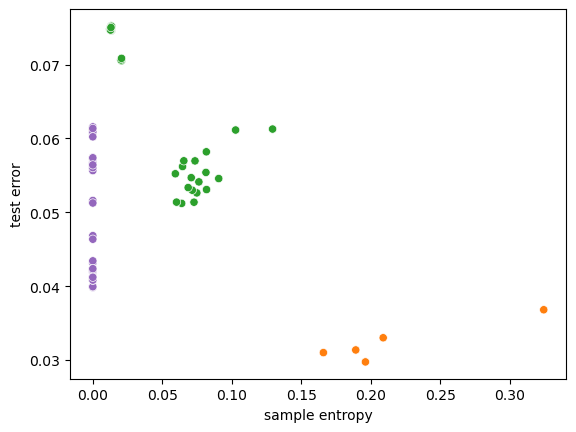

In [8]:
models = ['mnist_rand_init_10', 
          'mnist_stochastic_rand_init_10',
          'mnist_rand_init_temp', 
          'mnist_stochastic_rand_init_temp',
          'mnist_rand_init_importance',
          ]

models = 'mnist_rand_init_10|mnist_stochastic_rand_init_10|mnist_rand_init_temp|mnist_stochastic_rand_init_temp|mnist_rand_init_importance'

data_mean = data.groupby('filename').mean().reset_index()

model_data = data_mean[data_mean['filename'].str.contains(models)]
x = model_data['sample entropy']
print(x)
y = model_data['test error']

hues = []
for filename in model_data.filename:
    for model in models.split('|'):
        if model in filename:
            hues.append(model)
sns.scatterplot(x=x,y=y,hue=hues, legend=False)
